In [1]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


In [2]:
import sys 

assert sys.version_info >= (3, 7) 

In [3]:
from packaging import version 
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 

In [4]:
from pathlib import Path
import pandas as pd
import tarfile # For extracting the dataset
import urllib.request # For downloading the dataset

def load_housing_data(): # Load the California housing dataset
    """Download and extract the California housing dataset if not already present."""
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file(): # If the dataset is not already downloaded
        Path("datasets").mkdir(parents=True, exist_ok=True) #Create the datasets directory if it doesn't exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball: #We use a tarfile to open the downloaded file
            housing_tarball.extractall(path="datasets",filter="data") # Extract the contents to the datasets directory
    return pd.read_csv(Path("datasets/housing/housing.csv")) # Loads and read the CSV file into a pandas DataFrame and returns it

housing = load_housing_data() #Creating a variable housing and passing the DataFrame returned by the function

In [5]:
housing.head() #We can have a quick look at the first few rows of the DataFrame using the head() method

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() #We are using the info() method to get a concise summary of the DataFrame, including the number of entries, column names, data types, and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() #This will give us the count of each unique value in the "ocean_proximity" column, which indicates the proximity of each house to the ocean.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe() #This will give us a statistical summary of the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and quartiles.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project" # Define the path where images will be saved
IMAGES_PATH.mkdir(parents=True, exist_ok=True) # Create the directory if it doesn't exist

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): # Function to save figures
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}" # Construct the file path
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
import matplotlib.pyplot as plt

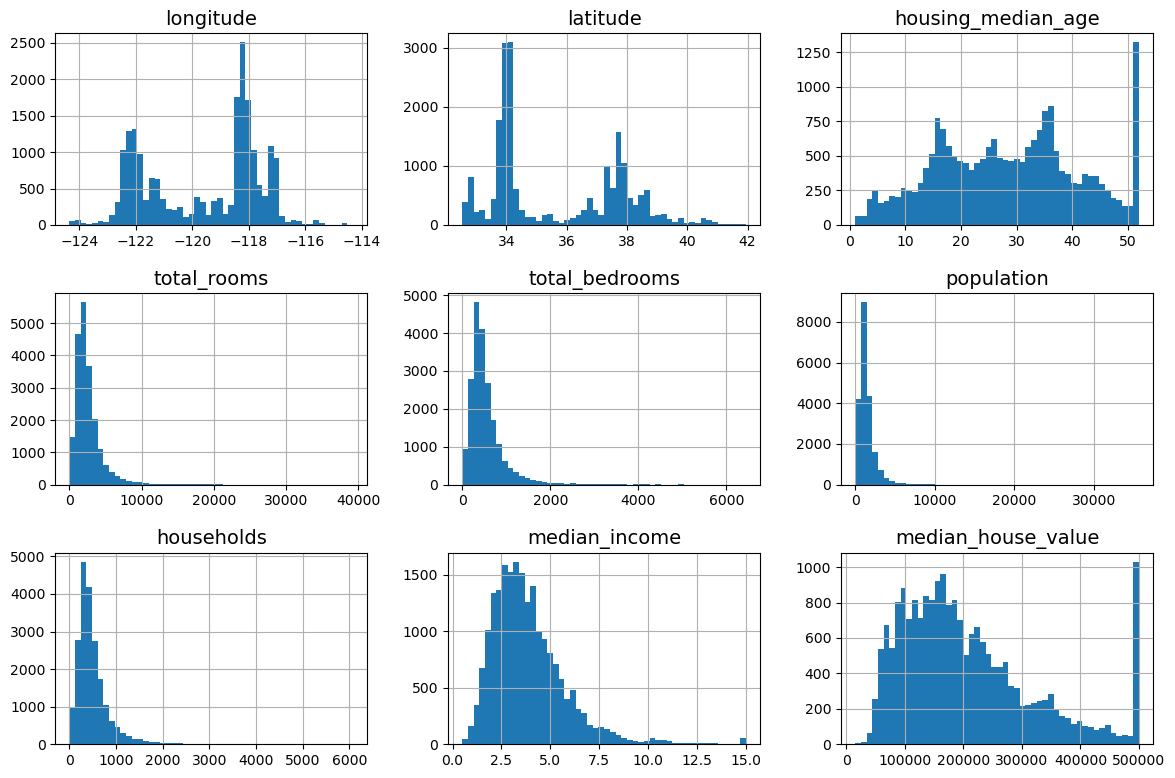

In [11]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio): # Function to shuffle and split the dataset into training and testing sets
    shuffled_indices = np.random.permutation(len(data)) # Generate a random permutation of indices
    test_set_size = int(len(data) * test_ratio) # Calculate the size of the test set
    test_indices = shuffled_indices[:test_set_size] # Select the first 'test_set_size' indices for the test set
    train_indices = shuffled_indices[test_set_size:] # Select the remaining indices for the training set
    return data.iloc[train_indices], data.iloc[test_indices] # Return the dataframes for training and testing sets

In [13]:
train_set, test_set = shuffle_and_split_data(housing, 0.2) # Shuffle the dataset and split it into a training set (80%) and a test set (20%)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [ ]:
np.random.seed(42) # Set a random seed for reproducibility. This ensures that the random operations (like shuffling) produce the same results every time the code is run, which is important for consistency in experiments and debugging.

In [16]:
from zlib import crc32 # We will use the crc32 function from the zlib library to compute a hash of the identifier. This function takes a byte string as input and returns a 32-bit integer hash value.

def is_id_in_test_set(identifier, test_ratio): # This function takes an identifier and a test ratio as input and returns True if the identifier should be in the test set, and False otherwise. It computes the hash of the identifier using crc32, converts it to a 64-bit integer, and checks if it is less than the threshold defined by the test ratio.
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

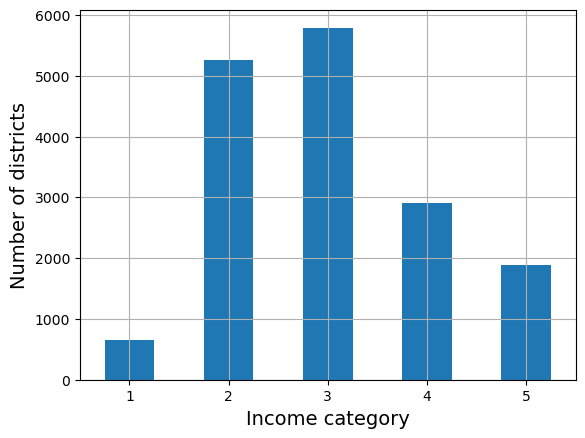

In [29]:
housing["income_cat"] = pd.cut(housing["median_income"], #Supposing that the median income is an important attribute to predict housing prices, we can create a new categorical attribute called "income_cat" by dividing the "median_income" attribute into 5 categories using the pd.cut() function. The bins parameter defines the edges of the categories, and the labels parameter assigns labels to each category.
bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit #We will use the StratifiedShuffleSplit class from the sklearn.model_selection module to perform stratified sampling based on the "income_cat" attribute. This ensures that the distribution of income categories is preserved in both the training and test sets.
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [31]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing["income_cat"]
)

In [32]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350590
2    0.318801
4    0.176203
5    0.114441
1    0.039964
Name: count, dtype: float64

In [33]:
for set_ in (strat_train_set, strat_test_set): #Dropping the "income_cat" because it was only needed for stratification and is not a feature we want to use for training our model. We use the drop() method to remove the "income_cat" column from both the stratified training and test sets, specifying axis=1 to indicate that we are dropping a column, and inplace=True to modify the DataFrames in place.
    set_.drop("income_cat", axis=1, inplace=True)

In [34]:
#We create a copy of the stratified training set and assign it to the variable housing.
#This is done to ensure that we have a separate DataFrame for our training data that we can work with without affecting the original stratified training set. By using the copy() method, we create a new DataFrame that is independent of the original, allowing us to perform any necessary preprocessing or analysis on this new DataFrame without modifying the original data.
housing = strat_train_set.copy()

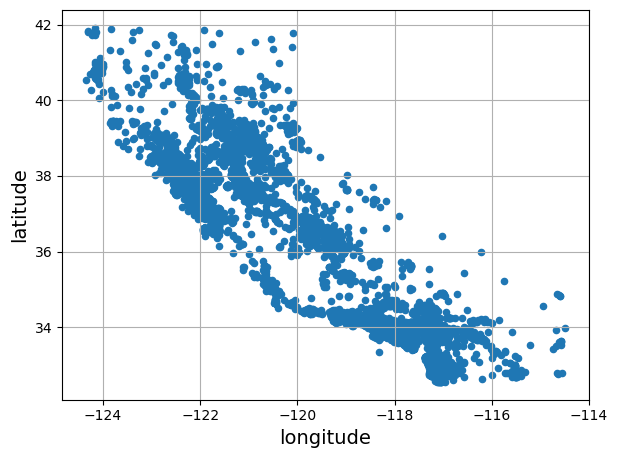

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

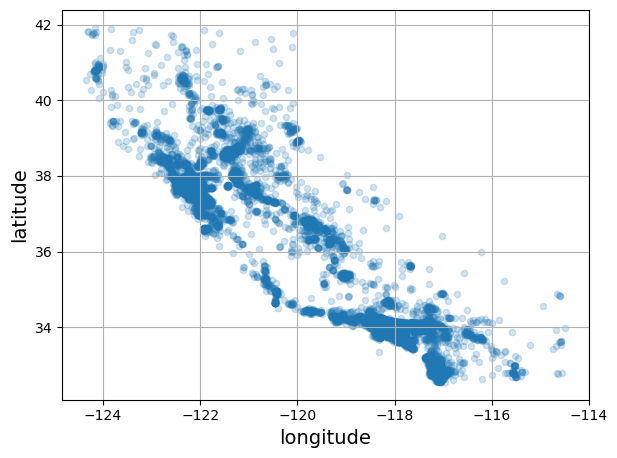

In [38]:
#Visualizing the Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()